# 프로젝트: SentencePiece 사용하기

### [SentencePiece](https://wikidocs.net/86657)
- Google에서 제공하는 오픈소스 기반 Sentence Tokenizer/Detokenizer
- BPE와 unigram 2가지 subword 토크나이징 모델 중 하나를 선택해서 사용할 수 있도록 패키징한 것

### Step 1. SentencePiece 설치하기

- `pip install sentencepiece`

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.16).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless python-pip-whl python3-asn1crypto
  python3-cffi-backend python3-crypto python3-cryptography python3-idna
  python3-keyring python3-keyrings.alt python3-pkg-resources
  python3-secretstorage python3-setuptools python3-six python3-wheel
  python3-xdg x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic

In [3]:
!python3 -m pip install --upgrade pip
!python3 -m pip install konlpy       # Python 3.x

     |████████████████████████████████| 2.1 MB 33.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.0/449.0 KB 43.8 MB/s eta 0:00:00


In [4]:
!sudo apt-get install curl git
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.16).
git is already the newest version (1:2.17.1-1ubuntu0.9).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [80.4 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/re

In [5]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.9 MB/s eta 0:00:00


In [6]:
!pip install konlpy

In [7]:
# 이전 스텝 filtered_corpus를 위한 요약
import os
import numpy as np
path_to_file = '/content/drive/MyDrive/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f: 
    raw = f.read().splitlines() # 줄 단위로 읽어봅시다.

In [8]:
raw[:5]

['개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"',
 '모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.',
 '그러나 이것은 또한 책상도 필요로 하지 않는다.',
 '79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분이든 그 움직임에따라 커서의 움직임을 조절하는 회전 운동 센서를 사용하고 있다.',
 '정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔음을 밝혔으며, 세계 해상 교역량의 거의 3분의 1을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다.']

In [9]:
min_len = 999
max_len = 0

for sen in raw:
    length = len(sen)
    
    # 문장 최소 길이 찾기
    if min_len > length: 
        min_len = length
    
    # 문장 최대 길이 찾기
    if max_len < length: 
        max_len = length
        
    
sentence_length = np.zeros((max_len), dtype=np.int)

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.

filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


In [10]:
print(f'max_len : {max_len},  min_len : {min_len}')

max_len : 377,  min_len : 1


In [11]:
# max_len 같은 shape에 0으로 할당된 변수
sentence_length

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
# 중복을 제거한 copus
len(cleaned_corpus)

77591

In [13]:
# max_len보다 작고 min_len보다 크거나 같은 문장의 corpus
len(filtered_corpus)

77590

- cleaned_corpus 와 filtered_corpus 간 차이는 1문장 이다.

### Step 2. SentencePiece 모델 학습

- `tf.keras.preprocessing.text.Tokenizer`에 corpus를 주고 `tokenizer.fit_on_texts(corpus)`을 하면 토크나이저 내부적으로 단어사전과 토크나이저 기능을 corpus에 맞춤형으로 자동 생성해 주는 것이다.

In [14]:
import sentencepiece as spm
import os
temp_file = '/content/drive/MyDrive/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

# vacab size
vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
# 위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. 
# --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.
# input: 입력 corpus
# prefix: 저장할 모델 이름
# vocab_size: vocab 개수 (기본 8,000)


!ls -l korean_spm*

# SentencePiece 모델 학습이 완료된 후 koreanspm.model 파일과 
# koreanspm.vocab vocabulary 파일이 생성되었음을 확인

-rw-r--r-- 1 root root 376740 Mar 22 15:31 korean_spm.model
-rw-r--r-- 1 root root 146094 Mar 22 15:31 korean_spm.vocab


- 정상적으로 SentencePiece 모델 학습이 완료된 후 `korean_spm.model` 파일과   
  `korean_spm.vocab` vocabulary 파일이 생성되었음을 확인할 수 있다.


- 학습된 SentencePiece 모델을 어떻게 활용하는지 살펴보자.

In [15]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(f'tokensIDs : {tokensIDs}', '\n')

# SentencePiece를 활용한 sentence -> encoded pieces
print(f's.SampleEncodeAsPieces : {s.SampleEncodeAsPieces("아버지가방에들어가신다.", 1, 0.0)}', '\n')

# SentencePiece를 활용한 encoding -> sentence 복원
print(f's.DecodeIds(tokensIDs) : {s.DecodeIds(tokensIDs)}', '\n')

tokensIDs : [1255, 11, 304, 7, 3606, 11, 285, 38, 3] 

s.SampleEncodeAsPieces : ['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.'] 

s.DecodeIds(tokensIDs) : 아버지가방에들어가신다. 



In [16]:
# 띄어쓰기를 하면 어떻게 될까?

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가 방에 들어가신다.')
print(f'tokensIDs : {tokensIDs}', '\n')

# SentencePiece를 활용한 sentence -> encoded pieces
print(f's.SampleEncodeAsPieces : {s.SampleEncodeAsPieces("아버지가 방에 들어가신다.", 1, 0.0)}', '\n')

# SentencePiece를 활용한 encoding -> sentence 복원
print(f's.DecodeIds(tokensIDs) : {s.DecodeIds(tokensIDs)}', '\n')

tokensIDs : [1255, 11, 833, 7, 2342, 285, 38, 3] 

s.SampleEncodeAsPieces : ['▁아버지', '가', '▁방', '에', '▁들어가', '신', '다', '.'] 

s.DecodeIds(tokensIDs) : 아버지가 방에 들어가신다. 



- 제법 잘 구동되는 것을 확인할 수 있다.

### Step 3. Tokenizer 함수 작성
___

위에서 훈련시킨 SentencePiece를 활용하여 위 함수와 유사한 기능을 하는 `sp_tokenize()` 함수를 정의할 것이다.  
하지만 SentencePiece가 동작하는 방식이 단순 토큰화와는 달라 완전히 동일하게는 정의하기 어렵기에  
아래 조건을 만족하는 함수를 정의하려 한다.

>1) 매개변수로 토큰화된 문장의 `list`를 전달하는 대신 **온전한 문장**의 `list` 를 전달한다.
>
>2) **생성된 vocab 파일**을 읽어와 `{ <word> : <idx> }` 형태를 가지는 word_index 사전과 `{ <idx> : <word>}` 형태를 가지는 `index_word` 사전을 생성하고 함께 **반환**한다.
>
>3) 리턴값인 `tensor` 는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장이다.  

In [17]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [18]:
#sp_tokenize(s, corpus) 사용예제
import tensorflow as tf

my_corpus = ['나는 컴퓨터 활용을 좋아합니다.',
             '나는 저녁밥을 먹었습니다.',
             '하지만 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1957  850 3532    5 2888 1300    3    0    0    0    0    0    0    0]
 [1957 3383 7743    5    4 7975 2012    3    0    0    0    0    0    0]
 [ 789 1658  101    4    0  470   11    4   14    0 2002    3    3    3]]


### Step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기
___

네이버 영화리뷰 감정 분석 태스크가 있다.  
한국어로 된 corpus를 다루어야 하므로 주로 `KoNLPy`에서 제공하는 형태소 분석기를 사용하여 텍스트를 전처리해서 `RNN` 모델을 분류기로 사용하게 된다.

만약 이 문제에서 `tokenizer`를 `SentencePiece`로 바꾸어 다시 풀어본다면 더 성능이 좋아질까?  
비교해 보는 것도 흥미로울 것이다.

- 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기
- 학습된 모델로 sp_tokenize() 메소드 구현하기
- 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기
- KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
- (보너스) SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기 


### Naver sentiment movie corpus v1.0 download

In [19]:
# !wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
# !wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

In [20]:
# download 확인
# !ls -l ratings*

In [21]:
# 사용할 library version 확인
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as plt
import konlpy

%matplotlib inline

print(f'tensorflow : {tf.__version__}')
print(f'numpy : {np.__version__}')
print(f'pandas : {pd.__version__}')
print(f'matplotlib : {plt.__version__}')
print(f'konlpy : {konlpy.__version__}')

tensorflow : 2.8.0
numpy : 1.21.5
pandas : 1.3.5
matplotlib : 3.2.2
konlpy : 0.6.0


### 데이터 불러오기

In [22]:
df_train = pd.read_table('/content/drive/MyDrive/aiffel/GD_NLP/ratings_train.txt') 
df_test = pd.read_table('/content/drive/MyDrive/aiffel/GD_NLP/ratings_test.txt')

print("Train Data shape : ", df_train.shape)
print("Test Data shape : ", df_test.shape)

Train Data shape :  (150000, 3)
Test Data shape :  (50000, 3)


In [23]:
df_train.columns

Index(['id', 'document', 'label'], dtype='object')

In [24]:
df_train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [25]:
df_test.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


### 데이터 정제

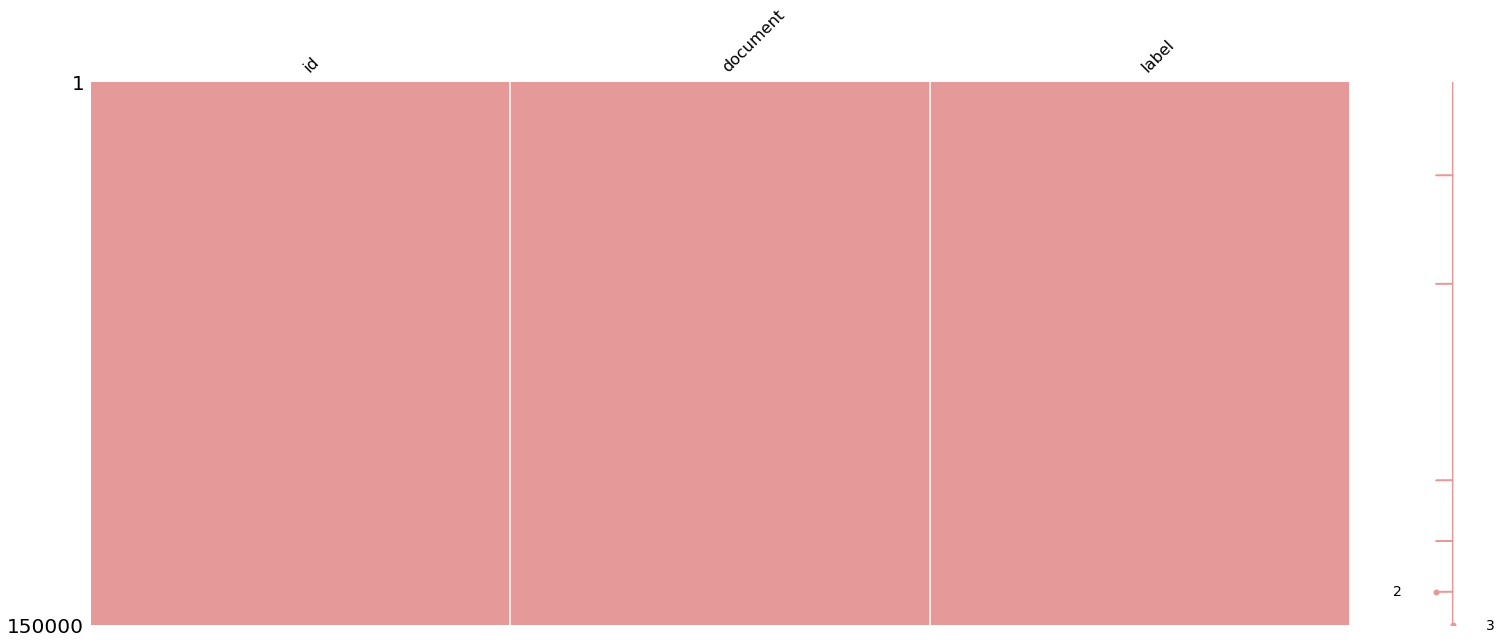

In [26]:
import missingno as msno    # 결측데이터들을 파악하는데 직관적인 도움을 주는 패키지

# 결측치 시각화 확인(matrix)
msno.matrix(df_train, color=(0.9, 0.6, 0.6))   # color = (R, G, B)

- matrix 에서는 5개의 결측치가 확인되지만 어느 칼럼에 있는 것인지 명확하지 않다.
- 아래 bar 차트로 다시 확인해 보자.

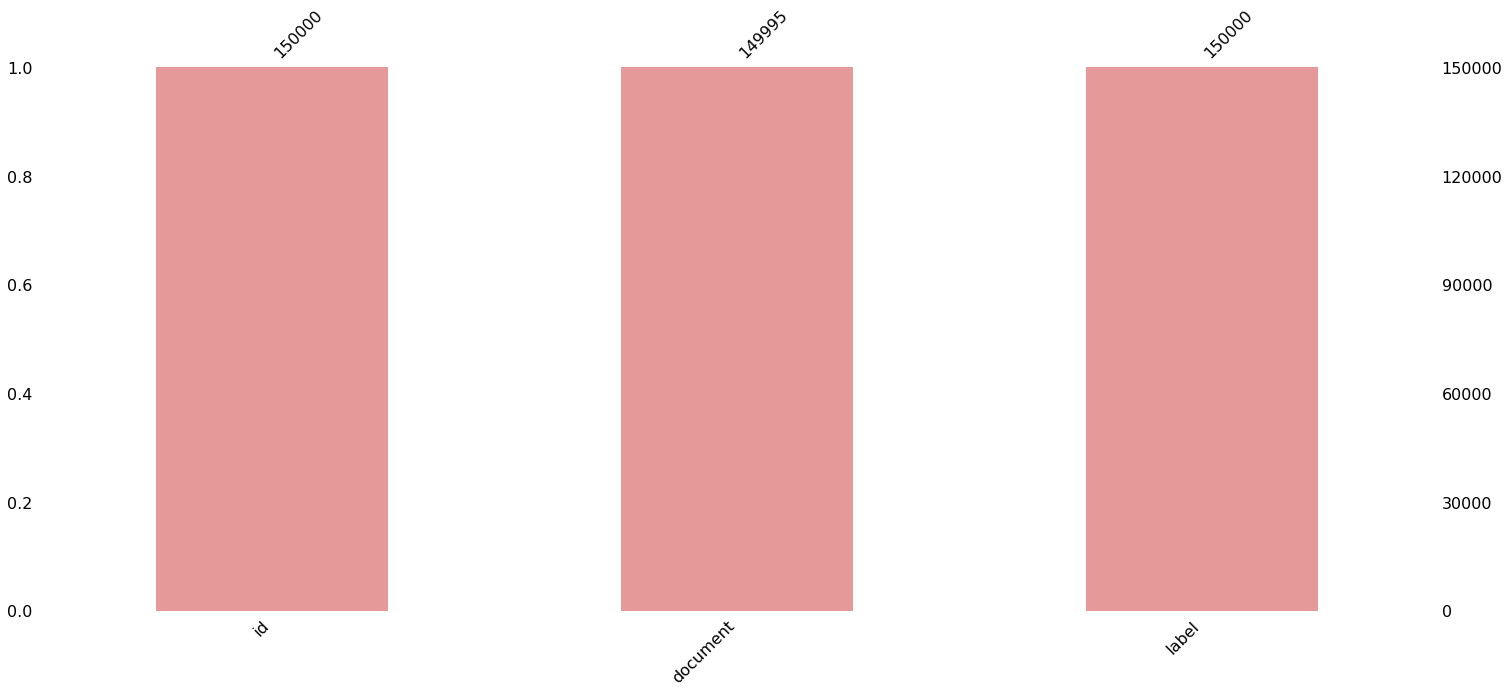

In [27]:
msno.bar(df_train, color=(0.9, 0.6, 0.6))   # color = (R, G, B)

- 위 차트와 같이 document에서 5개의 결측치가 있음을 확인할 수 있다.
- 아래에서 명확하게 확인해 보자.

In [28]:
# 결측치 확인
print(df_train.isnull().sum())
df_train.loc[df_train.document.isnull()]

id          0
document    5
label       0
dtype: int64


,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [29]:
# 결측치 제거
df_train = df_train[df_train['document'].notna()]
df_train.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [30]:
# train, test 데이터 유니크 수 확인
print(f'train  unique 수 : {df_train["document"].nunique()}')
print(f'train["document"] 중복 수 : {df_train.duplicated(subset=["document"]).sum()}')
print(f'target unique 수 : {df_train["label"].nunique()}')
print(f'target unique 내용 : {df_train["label"].unique()}')

train  unique 수 : 146182
train["document"] 중복 수 : 3813
target unique 수 : 2
target unique 내용 : [0 1]


- 3813개의 중복 데이터 존재
- label은 0 과 1 두가지 존재

In [31]:
# 중복 데이터에 어떤 내용이 있는지 확인해 보자.
duplicated = df_train[df_train.duplicated(subset=['document'])]
duplicated['document'].value_counts()

굿                     180
good                   91
최고                     84
쓰레기                    78
별로                     65
                     ... 
최악.....                 1
재미있었습니다                 1
재밌게 봤습니다.               1
이 영화를 보고 암이 나았습니다.      1
오우                      1
Name: document, Length: 1136, dtype: int64

- 한 단어의 짧은 문장들이 중복이 많음을 알 수 있다.

In [32]:
# 중복데이터 제거
df_train.drop_duplicates(subset=['document'], inplace=True)
df_train.duplicated(subset=["document"]).sum()

0

In [33]:
# 데이터 전처리
df_train['document'] = df_train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)
df_train[:10]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
5,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나,1


In [34]:
# 바뀐 데이터 내부에 null값이 있는지 다시 확인
# white space 데이터를 empty value로 변경
df_train['document'] = df_train['document'].str.replace('^ +', "", regex=True) 
df_train['document'].replace('', np.nan, inplace=True)
# print(df_train.isnull().sum())

In [35]:
# 결측치 다시 확인
print(df_train.isnull().sum())
df_train.loc[df_train.document.isnull()]

id            0
document    789
label         0
dtype: int64


,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0
...,...,...,...
149309,6715725,NaN,1
149358,6780491,NaN,0
149364,8014701,NaN,1
149630,3508604,NaN,0


In [36]:
# 결측치 다시 제거
df_train = df_train[df_train['document'].notna()]
df_train.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [37]:
# 전처리 후 train data shape
print(f'전처리 후 train data shape : {df_train.shape}')

전처리 후 train data shape : (145393, 3)


In [38]:
# 위 과정 test 데이터에도 동일한 과정 진행

# 중복데이터 제거
df_test.drop_duplicates(subset=['document'], inplace=True)

# 정규표현식 수행
df_test['document'] = df_test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)

# 공백은 empty로 변경
df_test['document'] = df_test['document'].str.replace('^ +', "", regex=True) 

# empty는 Null 값으로 변경
df_test['document'].replace('', np.nan, inplace=True)

# Null 값 제거
df_test = df_test[df_test['document'].notna()]

print(f'전처리 후 test data shape : {df_test.shape}')

전처리 후 test data shape : (48852, 3)


In [39]:
# 전처리 후 데이터 확인
df_train.info()
print("=====" * 10)
df_test.info()
print("=====" * 10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145393 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        145393 non-null  int64 
 1   document  145393 non-null  object
 2   label     145393 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48852 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        48852 non-null  int64 
 1   document  48852 non-null  object
 2   label     48852 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


- 문장 길이 분포 확인하기

문장의 최단 길이: 1
문장의 최장 길이: 140
문장의 평균 길이: 33 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


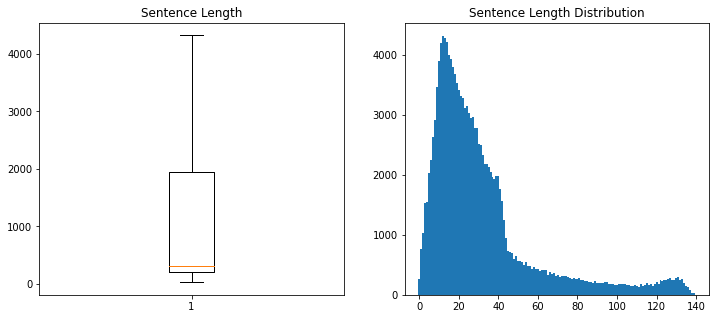

In [40]:
import matplotlib.pyplot as plt

min_len = 999
max_len = 0
sum_len = 0

for sen in df_train['document']:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(df_train), '\n')

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in df_train['document']:
    sentence_length[len(sen)-1] += 1

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

# 박스플롯
ax[0].boxplot(sentence_length)
ax[0].set_title('Sentence Length')

# 막대그래프
ax[1].bar(range(max_len), sentence_length, width = 1.0)
ax[1].set_title("Sentence Length Distribution")

# plt.tight_layout()
plt.show()
print()

# plt.bar(range(max_len), sentence_length, width=1.0)
# plt.title("Sentence Length Distribution")
# plt.show()

In [41]:
sentence_length

array([ 267,  765, 1029, 1532, 1557, 2026, 2255, 2631, 2915, 3460, 3895,
       4204, 4320, 4284, 4213, 4002, 3942, 3797, 3693, 3534, 3420, 3324,
       3291, 3116, 3152, 3029, 2943, 2968, 2782, 2790, 2515, 2507, 2336,
       2181, 2179, 2136, 2050, 1964, 1938, 1982, 1980, 1774, 1569, 1248,
        942,  739,  719,  697,  598,  649,  558,  570,  549,  505,  542,
        485,  478,  437,  457,  426,  427,  405,  417,  414,  413,  333,
        388,  348,  369,  312,  326,  295,  306,  320,  308,  304,  284,
        261,  286,  263,  268,  279,  242,  245,  235,  237,  218,  219,
        197,  226,  196,  204,  203,  192,  220,  207,  172,  185,  185,
        171,  170,  183,  175,  185,  175,  158,  161,  143,  153,  169,
        154,  133,  180,  153,  156,  200,  166,  173,  154,  184,  213,
        178,  239,  229,  254,  248,  263,  288,  254,  253,  287,  291,
        253,  267,  204,  153,  123,   81,   38,   26])

In [42]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen, '\t')
            count += 1
            if count > 100: return

check_sentence_with_length(df_train['document'], 90)

중국인 특유의 과장 허풍 있어보이려고 안간힘 쓴 노력은 가상하나 고증과 현실감 떨어지는 설정이 거북스럽다 도대체 그들은 왜 이렇게까지 스스로를 과대포장하는 것인지 	
이시간좀밝고긍정적인드라마보고싶어서보긴보는데오버하는연기들이거슬리네요연기인게너무표나요홍혜정역이그나마도후련기도하고시원하고나머진다들답답하네요낼월요일인데해피한것만보고싶네요 	
어딘가에서 일어나고 일일것같은 느낌이 강하다우베볼이 이런 영화를 만드는 이유는 누군가 실제로 따라 했으면 하고 바라는것 같은데 정장 월가 있는 애들이 보면 웃겠지 	
소재가 아름다운 영화 다소 아쉬운 부분들이 있는 이유는 이 영화는 영화스러운 극적 로맨스보단 좀 더 사실적으로 한 남자의 마음과 시선을 말하고 싶었기 때문 아닐까 	
한줄분석이 영화를 가장 좋아하는 그룹은 대 여자입니다 하 이런 쓰레기년들 주진모 송승헌 나왔다고 전설의 명화를 더럽힌 이딴 쓰레기 허세 겉멋영화를 점넘게 올려놓냐 	
박스오피스위 할만하네요초반 이야기시작 에피소드에서 웃음을찾고 중반부터 끝으로 갈수록 흥미진진한내용에 시간가는줄 몰랐습니다 점이아닌이유는너무 재밌어서 나만보려고찡끗 	
귀신을 법정에 세우는 과정을 나름 잘 엮어내긴 했다 하지만 너무나 손발이 오그라든다 어학공부 같은 나름의 목적이 있는게 아니라면 굳이 찾아서 볼 필요은 없는 영화 	
일본영화 수준을 알게해준 영화 ㅋㅋㅋㅋ보면서 신나게웃었다 유치함의 미학이 아니라 이게 뭔 영화인지 만화인지 분간조차 안가고 그나라 영화가 원래 그런건진 모르겠지만 	
완젼히 미친 드라마임 시청율 올리는 방법도 가지가지 몇회 안보다가 보면 또 미쳐하고 참 세상이 웃껴ㅋㅋ더티하게 이런 걸로 시청율 올리려려 심리 작전 하다니 ㅋㅋㅋ 	
별점 무난해서 그냥 점 주려다 점줌 평점 왜이럼 전문가라는 평론가들 저질 영화에는 윽수로 점수 후하게 주더만 무난한 영화에 점 ㅎㄷㄷ하구만 으리으리한 의리영화계네 	
아놔 짜증나네 트라우마 심리상담으로 이끌어가면서 뭐라도 있는듯 하더니 결국 하고있는 얘기는 딴소리 도저히 개연성과 흐름을 찾을

In [43]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 4
Outlier Index: 5
Outlier Index: 6
Outlier Index: 7
Outlier Index: 8
Outlier Index: 9
Outlier Index: 10
Outlier Index: 11
Outlier Index: 12
Outlier Index: 13
Outlier Index: 14
Outlier Index: 15
Outlier Index: 16
Outlier Index: 17
Outlier Index: 18
Outlier Index: 19
Outlier Index: 20
Outlier Index: 21
Outlier Index: 22
Outlier Index: 23
Outlier Index: 24
Outlier Index: 25
Outlier Index: 26
Outlier Index: 27
Outlier Index: 28
Outlier Index: 29
Outlier Index: 30
Outlier Index: 31
Outlier Index: 32
Outlier Index: 33
Outlier Index: 34
Outlier Index: 35
Outlier Index: 36
Outlier Index: 37
Outlier Index: 38
Outlier Index: 39
Outlier Index: 40
Outlier Index: 41
Outlier Index: 42
Outlier Index: 43


In [44]:
check_sentence_with_length(df_train['document'], 4)

재밋는뎅 	
킬링타임 	
아 빵점 	
연기 굿 	
좋은영화 	
굿 좋아 	
신선하네 	
재밌는데 	
ㄵ 점대 	
절대비추 	
구우우웃 	
펑점조절 	
지루하다 	
억지억지 	
목포 붹 	
패륜영화 	
좋은니다 	
재미없다 	
점만들자 	
자 제한 	
괜히봤다 	
재미없음 	
지루하다 	
재미없다 	
시시하다 	
완벽하다 	
장난치냐 	
몰떡몰떡 	
이건뭥미 	
잼슴ㅇㅎ 	
짠하네요 	
기대된디 	
실망이다 	
보고싶다 	
볼만해요 	
사랑한다 	
감동ㅜㅜ 	
나도별로 	
뭥미 헐 	
추억돋네 	
좋았어요 	
재밌어요 	
좋은영화 	
어이상실 	
볼만했음 	
평점조절 	
별로네요 	
자자자자 	
재밋어요 	
잼있어요 	
돈아깝다 	
미치겠다 	
알파치노 	
명작ㅎㅎ 	
어이없다 	
재밌나여 	
눈물나다 	
굿입니당 	
옥빈님짱 	
재밌어요 	
과연ㅋㅋ 	
넌센스다 	
피크타임 	
아들은  	
재밌었죠 	
중국이지 	
시시하네 	
따분하다 	
언제꺼임 	
화가난다 	
별로였음 	
뭐냐이게 	
개쩔었다 	
그지같다 	
재미없네 	
안무섭다 	
훈훈하당 	
아임낫뎃 	
푹 잤음 	
재밌네요 	
별로던데 	
괜찬았음 	
안과 겉 	
참쩔어요 	
재 밌다 	
좋습니다 	
괜찬군요 	
재밌네  	
걍 평작 	
짜증나서 	
괜찮았음 	
명작이다 	
재밋구만 	
공블리짱 	
이정시러 	
ㅡㅡ 네 	
코믹인가 	
잼나ㅎㅎ 	
완전좋아 	
명작이다 	
으하하하 	


In [45]:
def threshold_len(min_len, max_len, nested_list): #- length = len(sen)
    '''
    문장의 최대&최소 길이조건을 만족하는
    샘플의 전체샘플에 대한 비율을 출력합니다.
    '''
    cnt = 0
    for sen in nested_list:
        if (len(sen) <= max_len and len(sen) >= min_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이상이면서 %s 이하인 샘플의 비율 : %s'%(min_len, max_len, round(cnt / len(nested_list), 4)))

In [46]:
min_len = 4; max_len = 50
threshold_len(min_len, max_len, df_train.document)
cleaned_train = df_train.iloc[[idx for idx,s in enumerate(df_train.document) if (len(s) <= max_len) & (len(s) >= min_len)]]
cleaned_train.reset_index(drop=True, inplace=True) 
cleaned_train

전체 샘플 중 길이가 4 이상이면서 50 이하인 샘플의 비율 : 0.8238


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움,0
...,...,...,...
119773,6222902,인간이 문제지 소는 뭔죄인가,0
119774,8549745,평점이 너무 낮아서,1
119775,9311800,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
119776,2376369,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


In [47]:
# 길이 50이하로 한정해 데이터를 만든다. 

# 이렇게 하면 document 내용만 list로 전달됨 ==> 나는 데이터프레임을 원한다!!
train_list = [s for s in df_train['document'] if (len(s) <= 50)]
test_list = [s for s in df_test['document'] if (len(s) <= 50)]

train_list = list(set(train_list))
test_list = list(set(test_list))

train_df = pd.DataFrame(train_list)
test_df = pd.DataFrame(test_list)

In [48]:
# 길이 50이하인 데이터를 기존 데이터와 병합합니다.

new_train_df = pd.merge(df_train, train_df, how='inner', left_on='document', right_on=0)
new_test_df = pd.merge(df_test, test_df, how='inner', left_on='document', right_on=0)

train_data = new_train_df[['id', 'document', 'label']]
test_data = new_test_df[['id', 'document', 'label']]

In [49]:
display(train_data.head())
display(test_data.head())

print("train data : ",len(train_data))
print("test  data : ",len(test_data))

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움,0


,id,document,label
0,6270596,굳 ㅋ,1
1,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
2,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
3,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
4,7898805,음악이 주가 된 최고의 음악영화,1


train data :  121839
test  data :  40930


In [50]:
# document와 label을 나눠봅시다.

# X_train = []
# for sentence in train_data['document']: # document라는 곳에서 꺼낸당!
#     temp_X = s.EncodeAsIds(sentence) # 토큰화
#     X_train.append(temp_X)
    
# X_test = []
# for sentence in test_data['document']: # document라는 곳에서 꺼낸당!
#     temp_X = s.EncodeAsIds(sentence) # 토큰화
#     X_test.append(temp_X)

# 자꾸 오류 발생 list로 전환한 뒤 적용해봅시다.
X_train, X_train_word_index, X_train_index_word = sp_tokenize(s, train_data['document'])
X_test, X_test_word_index, X_test_index_word = sp_tokenize(s, test_data['document'])

In [51]:
# 현재 list 상태 ==> ndarray로 바꿔주기
y_train = np.array(list(train_data['label']))
y_test = np.array(list(test_data['label']))

In [52]:
print(X_train[:3], '\n')
print(X_test[:3], '\n')

[[ 138  106 2662  918 4930    4 4930  839   69  553  517 2630    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   4 7660  465 1773  144   14  440 3232 2763 1800  177  410  394   41
  4251    4   11 7571   29 2410  242   69    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [1343  444    0  257  229  585   94  144   10 1978    5  999  640  245
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]] 

[[   4 7889    4    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   4 7826  165   25 1105  349  107  180 5502  162

In [53]:
print(y_train[:3])
print(y_test[:3])

[0 1 0]
[1 0 0]


In [54]:
print("학습데이터 :",len(X_train))
print("타겟데이터 :",len(y_train))

학습데이터 : 121839
타겟데이터 : 121839


### 훈련데이터와 검증데이터 분리

In [55]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(X_train,
                                                                    y_train,
                                                                    test_size=0.2,
                                                                    random_state=42)

In [56]:
print(train_input[:3])
print(val_input[:3])

[[4784 6683   70  517    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [2509 1846  540 3502  773  326   11 1150 2763    7 2575    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [1984  221  112   81    4 5454 4021  106  706 1541 2629  969    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]]
[[ 210   11 1343  301  136   11 2629   94  227  210 3931   48  144  147
    25 5413  210   10  296 3946   36  301  136   11    4 7997 1076    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [ 572 2763  424 2255  157    4 5492  543  

In [57]:
# LSTM 모델 선언

from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(8000,16))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          128000    
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 128,881
Trainable params: 128,881
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_input, train_target, epochs=15, validation_data=(val_input, val_target))

Epoch 1/15
3046/3046 [==============================] - 23s 6ms/step - loss: 0.4994 - accuracy: 0.7426 - val_loss: 0.4129 - val_accuracy: 0.8083
Epoch 2/15
3046/3046 [==============================] - 17s 5ms/step - loss: 0.4018 - accuracy: 0.8155 - val_loss: 0.4010 - val_accuracy: 0.8152
Epoch 3/15
3046/3046 [==============================] - 17s 5ms/step - loss: 0.3728 - accuracy: 0.8294 - val_loss: 0.3974 - val_accuracy: 0.8141
Epoch 4/15
3046/3046 [==============================] - 17s 5ms/step - loss: 0.3524 - accuracy: 0.8398 - val_loss: 0.3886 - val_accuracy: 0.8217
Epoch 5/15
3046/3046 [==============================] - 17s 5ms/step - loss: 0.3354 - accuracy: 0.8498 - val_loss: 0.3944 - val_accuracy: 0.8187
Epoch 6/15
3046/3046 [==============================] - 16s 5ms/step - loss: 0.3216 - accuracy: 0.8580 - val_loss: 0.4029 - val_accuracy: 0.8223
Epoch 7/15
3046/3046 [==============================] - 17s 5ms/step - loss: 0.3082 - accuracy: 0.8667 - val_loss: 0.4075 - val_ac

In [60]:
result = model.evaluate(X_test,  y_test, verbose=2)
print(result)

# loss : 0.50 / accuracy : 0.82

1280/1280 - 4s - loss: 0.4908 - accuracy: 0.8184 - 4s/epoch - 3ms/step
[0.49081483483314514, 0.8183728456497192]


### 회고

- epochs을 10으로 설정했을 때는 학습이 부족했는지 정확도가 80미만으로 나왔다.
- 학습을 충분히 하도록 epochs을 15로 증가하니 정확도가 상승하여 약 82이상으로 나왔다.
- 다른 형태소 분석기도 시도해 보았으나 오류로 인해서 어려움을 격었다. 
- 끝내 오류를 수정하지 못하여 다른 형태소와의 비교는 실패하였다.
- 추후에 세심하게 다시 시도해 보려한다.